In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('E:\\machine learning\\Housepriceprediction.csv')
df.drop("Id",axis=1,inplace=True)
df

,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,8450,7,856,1710,8,2,548,208500
1,9600,6,1262,1262,6,2,460,181500
2,11250,7,920,1786,6,2,608,223500
3,9550,7,961,1717,7,3,642,140000
4,14260,8,1145,2198,9,3,836,250000
...,...,...,...,...,...,...,...,...
1455,7917,6,953,1647,7,2,460,175000
1456,13175,6,2073,2073,7,2,500,210000
1457,9042,7,1188,2340,9,1,252,266500
1458,9717,5,1078,1078,5,1,240,142125


In [3]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 460 , random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1000, 7) (460, 7) (1000,) (460,)


In [4]:
x_train

,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea
1447,10000,8,1220,2090,8,2,556
323,5820,3,1163,1163,6,1,220
1424,9503,5,1344,1344,6,1,484
1309,7153,6,1294,1294,6,2,496
719,9920,5,971,971,5,1,300
...,...,...,...,...,...,...,...
715,10140,6,1350,1350,7,2,478
905,9920,5,1063,1063,6,1,280
1096,6882,6,773,1355,7,0,0
235,1680,6,483,987,5,1,264


In [5]:
x_train.insert(0, 'x0', np.ones(1000))
x_train

,x0,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea
1447,1.0,10000,8,1220,2090,8,2,556
323,1.0,5820,3,1163,1163,6,1,220
1424,1.0,9503,5,1344,1344,6,1,484
1309,1.0,7153,6,1294,1294,6,2,496
719,1.0,9920,5,971,971,5,1,300
...,...,...,...,...,...,...,...,...
715,1.0,10140,6,1350,1350,7,2,478
905,1.0,9920,5,1063,1063,6,1,280
1096,1.0,6882,6,773,1355,7,0,0
235,1.0,1680,6,483,987,5,1,264


In [6]:
y_train

1447    240000
323     126175
1424    144000
1309    179200
719     128500
         ...  
715     165000
905     128000
1096    127000
235      89500
1061     81000
Name: SalePrice, Length: 1000, dtype: int64

# By Gradient Decent Method

In [7]:
#h(c) = c0.x0 + c1.x1 +....+c7.x7
def model1(x_train,y_train,x_test,y_test):
    c = np.zeros(8)
    p = np.zeros(8)
    itr = 10000
    e = []
    l = 0.000000000001
    for i in range(itr):
        for j in range(8):
            p[j] = c[j] - l*(sum((x_train@c - y_train)*x_train.iloc[:,j]))
        c = p.copy()
        error = sum(np.square(x_train@c - y_train))
        e.append(error)
    print('Coeficients are:',c)
    yp = x_train@c
    error = np.sqrt((sum(np.square(yp - y_train)))/len(y_train))
    print("root mean square error=", error)
    plt.plot(np.arange(1,itr+1),e)
    plt.title('error with respect to itteration');
    R2 = 1 - (sum(np.square(y_test - x_test@c))/sum(np.square(y_test - y_test.mean())))
    print('R2 score is ',R2)

In [8]:
x_test.insert(0 , 'x0', np.ones(460))

Coeficients are: [3.61474356e-02 2.97009347e-01 5.73828970e-01 4.69821074e+01
 6.75422261e+01 2.55698048e-01 1.93031190e-01 4.52891039e+01]
root mean square error= 50355.50418634995
R2 score is  0.6560429053860286
Wall time: 1min 6s


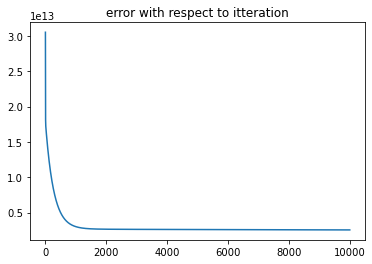

In [9]:
%%time
model1(x_train,y_train,x_test,y_test)

# By Normal Equation

In [14]:
def model2(x_train,y_train,x_test,y_test):
    i = np.linalg.inv(x_train.T@x_train)
    b = x_train.T@y_train
    w = i@b
    yp = x_test@w
    print('prediction price for x_test data:',yp)
    R2 = 1 - (sum(np.square(y_test - x_test@w))/sum(np.square(y_test - y_test.mean())))
    print('R2 score is ',R2)

In [16]:
%%time
model2(x_train,y_train,x_test,y_test)

prediction price for x_test data: 258     213394.802766
267     151016.212599
288     108289.616972
649      37643.832004
1233    148296.545975
            ...      
746     225616.219317
439     162808.848477
419     117571.778539
713     108638.266876
1127    242164.549020
Length: 460, dtype: float64
R2 score is  0.7971883770212929
Wall time: 17 ms


# By Using Sklearn

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
%%time

lr = LinearRegression()
fit = lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
print('mean squared error is:',mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)
print('r2 score is:',r2)
v = fit.coef_

mean squared error is: 1421616632.3718855
r2 score is: 0.7971883770213035
Wall time: 14.1 ms


# Report

In [ ]:
"""
For importing csv file i have used pandas library and sklearn library for dividing the data set to train data set and train data set.
(a)Model using Gradient Decent method
   Library used:-matplotlib, numpy
   r2 score:-0.65
   no of itaration:-10000
   Wall time:-1min
(b)Model using Normal Equation
   Library used:-numpy
   r2 score:-0.79
   Wall time:-17ms
(c)Model using LinearModel of Slearn
   Library used:-sklearn
   r2 score:-0.79
   wall time:-13ms
""""""